In [1]:
from feature_engineering import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import tree

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# read data in and write out data
data_dir = './data/'
train_df = pd.read_csv(data_dir + 'train.csv')
test_df = pd.read_csv(data_dir + 'test.csv')

# writing out to results file
def write_out(predictions):
    df_results = pd.DataFrame(predictions, columns=['label'])
    df_results.index.names = ['ID']
    df_results.to_csv(data_dir + 'results.csv')

In [3]:
# do feature engineering
train_df = date_features(train_df)
train_df = mail_features(train_df)
train_df = org_features(train_df)
train_df = chars_in_subject_features(train_df)
train_df = urls_features(train_df)
train_df = tld_features(train_df)

test_df = date_features(test_df)
test_df = mail_features(test_df)
test_df = org_features(test_df)
test_df = chars_in_subject_features(test_df)
test_df = urls_features(test_df)
test_df = tld_features(test_df)

In [7]:
train_df.columns


Index([             'Unnamed: 0',                    'date',
                           'org',                     'tld',
                           'ccs',                   'bcced',
                     'mail_type',                  'images',
                          'urls',             'salutations',
                   'designation',        'chars_in_subject',
                 'chars_in_body',                   'label',
                     'date_time',                    'time',
                     'time_zone',                    'year',
                         'month',                     'day',
                       'weekday',                         0,
                               1,                         2,
                               3,                         4,
                               5,                         6,
         'multipart/alternative',           'multipart/idm',
               'multipart/mixed',       'multipart/related',
                     'te

In [9]:
test_df.columns

Index([             'Unnamed: 0',                    'date',
                           'org',                     'tld',
                           'ccs',                   'bcced',
                     'mail_type',                  'images',
                          'urls',             'salutations',
                   'designation',        'chars_in_subject',
                 'chars_in_body',               'date_time',
                          'time',               'time_zone',
                          'year',                   'month',
                           'day',                 'weekday',
                               0,                         1,
                               2,                         3,
                               4,                         5,
                               6,   'multipart/alternative',
               'multipart/mixed',       'multipart/related',
                     'text/html',              'text/plain',
                      'a

In [10]:
# select columns / split into x and y 
X_train = train_df[train_df.columns.difference(['label', 'date', 'org', 'tld', 'time_zone', 'date_time', 'time', 'mail_type', 'chars_in_subject', 'urls', 'weekday'])]
y_train = train_df['label']

test_df['multipart/idm'] = 0
test_df['porn'] = 0
X_test = test_df[test_df.columns.difference(['label', 'date', 'org', 'tld','time_zone', 'date_time', 'time', 'mail_type', 'chars_in_subject', 'urls', 'weekday'])]


In [11]:
# define classifier 
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
# predict 
y_pred = clf.predict(X_test)
result_rf = cross_val_score(clf, X_train, y_train, cv=5)
result_rf.mean()

0.9226245668581587

[5.77211339e-03 5.45575042e-03 5.09869964e-03 5.29505993e-03
 5.52768411e-03 4.03029908e-03 3.55294829e-03 3.73819684e-02
 1.34979928e-01 6.24044278e-04 5.31738485e-05 5.03890962e-02
 1.04433546e-02 1.11171892e-01 3.09167617e-02 1.14672981e-02
 3.32468631e-02 8.99830504e-03 6.92540847e-03 2.95499553e-03
 6.89277961e-04 1.29093214e-02 9.62766547e-02 3.15766885e-02
 1.28969619e-02 2.51023469e-06 7.70212588e-03 1.45486701e-03
 2.74154489e-02 1.59633241e-02 1.39354388e-02 3.18608975e-02
 6.85653138e-05 1.95986833e-02 8.13582710e-02 1.50289004e-03
 1.10160765e-02 2.40515787e-03 6.98668618e-04 6.41928706e-02
 9.21896551e-02]


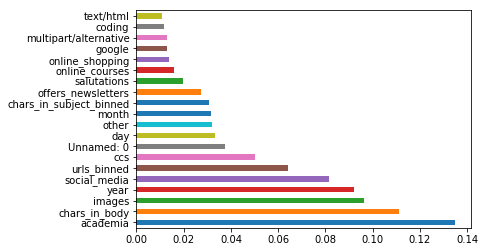

In [16]:
import matplotlib.pyplot as plt

print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [17]:


write_out(y_pred)
